## Homework 02: due 22:00, Friday, October 7, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW2), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW2.zip).
### - Submit the homework directly through the NTU COOL course website.


### 0. import essential modules

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. Work with data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_ and perform the following analysis.

##### 1.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv_ and make column 'datetime' datetime format and make it index* of the dataframe 

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [137]:
df = pd.read_csv('./Data/Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df.set_index('date')
print(type(df['date']))
for col in df.columns:
    print(col)

<class 'pandas.core.series.Series'>
date
1_9943
1_9944
1_10131
1_10132
1_10133
1_10134
1_10317
1_10318
1_10319
1_10320
1_10321
1_10322
1_10323
1_10324
1_10504
1_10505
1_10506
1_10507
1_10508
1_10509
1_10510
1_10511
1_10512
1_10513
1_10514
1_10691
1_10692
1_10693
1_10694
1_10695
1_10696
1_10697
1_10698
1_10699
1_10700
1_10701
1_10702
1_10703
1_10880
1_10881
1_10882
1_10883
1_10884
1_10885
1_10886
1_10887
1_10888
1_10889
1_10890
1_10891
1_10892
1_10893
1_11068
1_11069
1_11070
1_11071
1_11072
1_11073
1_11074
1_11075
1_11076
1_11077
1_11078
1_11079
1_11080
1_11081
1_11257
1_11258
1_11259
1_11260
1_11261
1_11262
1_11263
1_11264
1_11265
1_11266
1_11267
1_11268
1_11269
1_11270
1_11446
1_11447
1_11448
1_11449
1_11450
1_11451
1_11452
1_11453
1_11454
1_11455
1_11456
1_11457
1_11458
1_11459
1_11460
1_11635
1_11636
1_11637
1_11638
1_11639
1_11640
1_11641
1_11642
1_11643
1_11644
1_11645
1_11646
1_11647
1_11648
1_11649
1_11650
1_11653
1_11824
1_11825
1_11826
1_11827
1_11828
1_11829
1_11830
1_11831
1

##### 1.2. (5%) Extract non-zero 3-day rainfall data.

In [51]:
df_3d = df.resample('3D', on='date').sum().reset_index()
# df_3d_nonzero = df_3d[df_3d>=0]
df_3d.replace(0, np.nan, inplace=True) # By StackOverflow
df_3d
# Convert 0 to NaN
# for i in range(len(df_3d.index)):
#     print(i)
#     for j in range(len(df_3d.columns)):
#         if df_3d.loc[i].iat[j] == 0:
#             df_3d.loc[i].iat[j] = np.nan

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.235619,1.250143,1.261638,1.268328,1.272727,1.277125,1.280366,1.284529,1.290669,1.656351
1,1981-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-01-07,28.483840,28.196543,28.939207,28.656284,28.368468,28.159972,29.197316,29.300624,29.291067,...,30.045402,30.542404,30.948935,31.222417,31.402328,31.588010,31.730709,32.003136,32.320444,28.423012
3,1981-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.659582,0.723614,0.789371,0.859376,0.867635,0.882081,0.926042,1.082689,1.326361,0.532842
4,1981-01-13,43.036886,42.341474,44.427364,43.730114,43.026596,42.306026,47.305453,46.635144,45.889711,...,72.570076,72.695414,72.702584,72.647177,72.651822,72.681124,72.673059,72.637297,72.593650,71.929089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4988,2021-12-21,1.991874,1.958722,3.121767,3.093238,3.048189,2.994415,4.343554,4.351193,4.347548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4989,2021-12-24,30.600344,30.182362,30.343969,29.948587,29.515924,29.082394,30.619465,30.413286,30.120138,...,25.834822,25.934289,26.048713,26.079551,26.149138,26.394450,26.982628,27.484875,27.719927,24.812613
4990,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.555963,0.370590,0.184598,0.008094,NaN,NaN,NaN,NaN,NaN,0.988566


#### 1.3. (5% + 10% + 10%) Calculate the quantile values, $q_p (X)$, of 3-day non-zero rainfall data for each location and for each calendar month for $p=0.75$ and $0.95$, and identify the maximum $0.75$ and $0.95$ quantiles, respectively, from all locations and the associated location IDs* for each calendar month. Please export the result to a _CSV_ file named "Rain_MD-Androy-Bekily_3d-NonZero-Max-Quantiles_19810101-20211231.csv"

#### The output CSV file format shall look like the following:

Month,max_q-0.75, id_q-0.75, max_q-0.95, id_q-0.95

January,xx.xx, idddd, yy.yy, iiiidd

Feburary,ss.ss, iiddd, hh.hh, iidddd

..., ..., ..., ..., ...

> 補充：各個地點12個月份的0.75/0.95，再比較同月份不同地點的百分位數75/95最大值

#### Some useful notes: 
1. To look for the location IDs, the _argmax_ method in _numpy_ module could be useful.  
2. To calculate quantiles from data with 'NaN' values, the _nanquantile_ method in _numpy_ module could be useful.

In [88]:
# Calendar module could be useful here to obtain the texts for months (e.g.'January').
import calendar

df_per75 = pd.DataFrame(columns = list(df_3d.columns))
df_per95 = pd.DataFrame(columns = list(df_3d.columns))

for i in range(1, 13, 1):
    tmp_row = [calendar.month_abbr[i]]
    tmp_row2 = [calendar.month_abbr[i]]
    for j in range(1, len(df_3d.columns), 1):
        tmp_df = df_3d[df_3d['date'].dt.month == i]
        tmp_col = tmp_df.iloc[:, [j]]
        a = np.nanpercentile(tmp_col, [75, 95])
        tmp_row.append(a[0])
        tmp_row2.append(a[1])
    df_per75.loc[i] = tmp_row
    df_per95.loc[i] = tmp_row2
    print(i)
    
print(df_per75)
print(df_per95)

1
2
3
4
5
6
7
8
9
10
11
12
   date     1_9943     1_9944    1_10131    1_10132    1_10133    1_10134  \
1   Jan  26.009346  25.677365  26.240231  25.615042  25.430906  25.198492   
2   Feb  24.537879  24.857079  24.943628  25.159667  25.285890  25.088828   
3   Mar  17.155004  17.031721  16.476146  16.653780  16.723284  16.536788   
4   Apr   8.795143   8.734369   8.857774   8.877225   8.843312   8.425226   
5   May   7.607299   7.513528   7.240904   7.242415   7.292953   7.238899   
6   Jun   8.246818   8.513281   7.751606   7.761952   7.946885   8.014325   
7   Jul   5.603162   5.643235   5.139298   5.141555   5.218904   5.162592   
8   Aug   3.534625   3.592285   3.424710   3.459753   3.453044   3.426346   
9   Sep   5.448636   5.612786   4.835267   4.886257   4.987183   5.073706   
10  Oct  12.067274  12.501442  11.742480  11.989473  12.655184  12.511850   
11  Nov  13.372675  13.148257  12.941383  13.053752  13.063144  12.900507   
12  Dec  22.978402  22.273205  23.703364  23.3803

In [191]:
output = pd.DataFrame(columns=['Month', 'max_q-0.75', 'id_q-0.75', 'max_q-0.95', 'id_q-0.95'])

# type(df_per75.iloc[[0], 1:len(df_per75.columns)].to_numpy())
# max_ele75_index = np.argmax(df_per75.iloc[[0], 1:len(df_per75.columns)].to_numpy())  # index of max value
# df_3d.columns[max_ele75_index]
# max_ele75 = df_per75.iloc[:, 1:len(df_per75.columns)].max(axis=1)
# max_ele75

for i in range(1, 13, 1):
    tmp_row = [calendar.month_abbr[i]]  # initialize with month
    max_ele75 = df_per75.iloc[:, 1:len(df_per75.columns)].max(axis=1)
    max_ele95 = df_per95.iloc[:, 1:len(df_per95.columns)].max(axis=1)
    max_ele75_index = np.argmax(df_per75.iloc[[0], 1:len(df_per75.columns)].to_numpy())  # index of max value
    a = df_3d.columns[max_ele75_index]
    max_ele95_index = np.argmax(df_per95.iloc[[0], 1:len(df_per95.columns)].to_numpy())  # index of max value
    b = df_3d.columns[max_ele95_index]
    tmp_row.append(max_ele75[i])
    tmp_row.append(a)
    tmp_row.append(max_ele95[i])
    tmp_row.append(b)
    print(tmp_row)
    output.loc[i-1] = tmp_row

output.to_csv('./Rain_MD-Androy-Bekily_3d-NonZero-Max-Quantiles_19810101-20211231.csv')

['Jan', 38.016853, '1_16782', 79.96400399999997, '1_18466']
['Feb', 34.7298735, '1_16782', 68.68825139999997, '1_18466']
['Mar', 26.514342, '1_16782', 54.855290999999994, '1_18466']
['Apr', 12.6020455, '1_16782', 26.71590320000002, '1_18466']
['May', 8.943123, '1_16782', 24.011110099999996, '1_18466']
['Jun', 8.513281, '1_16782', 14.898632399999991, '1_18466']
['Jul', 5.643235, '1_16782', 9.56784685, '1_18466']
['Aug', 5.9246275, '1_16782', 9.778882, '1_18466']
['Sep', 7.1167915, '1_16782', 18.08124325, '1_18466']
['Oct', 16.10242075, '1_16782', 31.50309200000002, '1_18466']
['Nov', 20.234887, '1_16782', 44.90546739999998, '1_18466']
['Dec', 38.798961500000004, '1_16782', 82.62272889999997, '1_18466']


### 2. Work with _Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv_, and complete the following tasks.

#### 2.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv_ and make column 'datetime' datetime format.

In [115]:
df2 = pd.read_csv('./Data/Rain_MD-Androy-Bekily_1M_19810101-20211231_CHIRPS.csv')
df2['date'] = pd.to_datetime(df2['date'], format='%Y/%m/%d')
df2.head(5)

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-01,82.06,80.95,84.23,83.12,82.00,80.98,87.78,87.17,86.35,...,121.83,122.46,122.91,123.22,123.48,123.77,124.00,124.42,124.99,120.07
1,1981-02-01,152.77,153.48,152.22,152.93,153.66,154.88,150.23,151.02,151.85,...,200.76,200.24,199.77,199.53,199.92,200.39,200.85,202.04,203.69,202.14
2,1981-03-01,58.34,58.47,58.37,58.49,58.61,58.83,57.85,58.09,58.32,...,79.52,78.95,78.13,77.28,76.50,75.73,74.99,74.39,73.96,80.33
3,1981-04-01,8.74,8.81,8.65,8.71,8.77,8.86,8.37,8.46,8.56,...,10.07,10.14,10.18,10.21,10.23,10.25,10.26,10.32,10.42,9.64
4,1981-05-01,25.97,25.96,25.59,25.63,25.65,25.65,24.77,24.93,25.09,...,15.05,15.10,15.20,15.31,15.43,15.54,15.66,15.76,15.85,14.84


#### 2.2 (10% + 10%) Assuming that Gamma distribution is a suitable distribution for the monthly rainfall, please fit the November rainfall for location '1_20919' with MLE and MoM methods and output the fitted parameters (using _print_), respectively.

In [121]:
from scipy.stats import gamma

df2_Nov = df2[df2['date'].dt.month == 11]
data_1_20919_Nov = df2_Nov['1_20919'] # Extract the ['1_20919'] column:41 years data
# print(data_1_20919_Nov.array)

# MLE method
mle_res = gamma.fit(data_1_20919_Nov.array, floc=0.0)  # floc=0.0 is 
print(f'With MLE, the fitted params are shape={mle_res[0]:.3f}, loc={mle_res[1]:.3f}, scale={mle_res[2]:.3f}')

# MoM method
mm_res = gamma.fit(data_1_20919_Nov.array, method="MM", floc=0.0)  #floc=0.0
print(f"With MoM, the fitted params are shape={mm_res[0]:.3f}, loc={mm_res[1]:.3f}, scale={mm_res[2]:.3f}")

With MLE, the fitted params are shape=6.256, loc=0.000, scale=7.376
With MoM, the fitted params are shape=5.597, loc=0.000, scale=8.244


#### 2.3 (5%) Perform visual inspection on the above fitting result by plotting the histogram (with default number of bins) from the rainfall data and the pdf of fitted Gamma distribution in a single plot. 

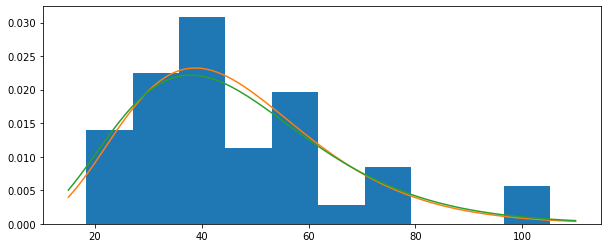

In [122]:
fig = plt.figure(figsize=(10, 4))

x = np.linspace(15, 110, 100)
y_mle_res = gamma.pdf(x, mle_res[0], mle_res[1], mle_res[2])
y_mm_res = gamma.pdf(x, mm_res[0], mm_res[1], mm_res[2])

ax = fig.add_subplot(111)
freqs, bins, patches = ax.hist(data_1_20919_Nov, density=True)

ax.plot(x, y_mle_res)
ax.plot(x, y_mm_res)

### 3. (35%) The generalised Pareto distribution (GPD) is a 3-parameter continuous distribution. It is famous for it 'fat' tail and is largely used fot extreme risk modelling. 

#### The probability density function (PDF) of GPD is termed:

$f(x) = \frac{1}{\sigma}(1+\kappa z)^{-1(\frac{1}{\kappa}+1)}$

#### And the cumulative density function (CDF) is termed:

$F(x) = 1-(1+\kappa z)^{-\frac{1}{\kappa}}$

#### where $z = \frac{x-\mu}{\sigma}$, and $\mu$, $\sigma$ and $\kappa$ are _location_, _scale_ and _shape_ parameters, respectively.


#### 3.1 (10% + 5%) __Without using Scipy or other similar stats libraries__, please implement two functions named _gpd_rvs_ and _gpd_pdf_. The _gpd_rvs_ function can be used to sample a GPD-distributed random variate, whilst the _gpd_pdf_ function is used to model the pdf of the GPD.

In [13]:
import random as rnd
import math

In [14]:
def gpd_rvs(mu, sigma, k):
    """Return a GPD-distributed random variate"""
    p = rnd.uniform(0, 1)
    rvs_gpd = (((1-p)**(-k) - 1) / k) * sigma + mu
    
    return rvs_gpd, p

In [ ]:
def gpd_pdf(x, mu, sigma, k):
    """Return a GPD density function value random variate"""
    z = (x - mu) / sigma
    p = (1 / sigma) * (1 + k * z)**(-(1 / k) + 1)
    
    return p

#### 3.2. (5%) Sample 300 GPD-distributed random variates using the _gpd_rvs_ function with the input parameters μ=1.5, σ=0.6 and k=1.05.

In [33]:
rvs_arr = []
for i in range(300):
    a = gpd_rvs(mu=1.5, sigma=0.6, k=1.05)
    rvs_arr.append(a[0])
    
print(rvs_arr)

[1.9364219165897212, 1.6229353063951866, 1.9372548873726736, 2.404724267349393, 5.538330089381486, 1.587004577950865, 4.8053444425560565, 2.889648859407997, 1.5120590540853442, 1.8081997550165543, 2.135297771615514, 1.9527169168197245, 2.532432064702602, 1.780960510065106, 48.662071730871304, 2.5877106988145737, 2.1946072076457632, 1.5846975677058615, 1.5465603976255013, 1.5084602244167826, 1.8445883422596279, 1.6536325553687212, 10.229350231671363, 1.5290124334397974, 1.5037514655532982, 1.7888916749521127, 1.513428009070898, 1.575441027015568, 3.982759211838716, 2.0537353968416623, 2.3326974601286916, 3.1222740390733694, 1.5268268906691946, 1.6235800932939097, 4.5138483995679035, 21.0626020230053, 1.861657325263696, 3.2496639074799507, 2.5709222576697734, 8.447131848131605, 1.7986301851628603, 1.5984698065890146, 1.5250968628629418, 2.5089842344399864, 4.6313932338954436, 1.789445370738111, 5.246554990951163, 1.8504361583172118, 2.549330819294805, 1.6414981109500006, 1.71222620019217

#### 3.3 (5% + 5%) Create a histogram plot for these sampled values using a fixed bin width $\nu$, which can be derived with the equation below.

$\nu=3.49sN^{-1/3}$

#### where $N$ is the number of data and $s$ is the sample standard deviation computed from data.

14.75137446084278
7.690433651648326


TypeError: 'float' object cannot be interpreted as an integer

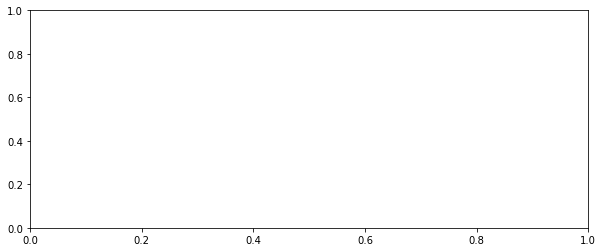

In [39]:
N = 300
s = np.std(rvs_arr)
print(s)
v = 3.49 * s * N**(-1 / 3)
print(v)

# Create a histogram plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
freqs, bins, patches = ax.hist(rvs_arr, bins=range(min(rvs_arr), max(rvs_arr) + v, v), density=True)

#### 3.4. (5%) Perform visual inspection by creating a line plot using the _gpd_pdf_ function with parameters μ=2, σ=0.5 and k=1.2, and add this line plot to the above histogram plot.    